In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import glob
import tensorflow_datasets as tfds

In [3]:
import pathlib
data_dir=r'C:\Users\Steven\OneDrive - Cal State LA\Documents\images2'

batch_size = 32
img_height = 500
img_width = 500

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
    
  image_size=(img_height, img_width),
  batch_size=batch_size)

#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#data_dir=r'C:\Users\Steven\OneDrive - Cal State LA\Documents\images2'
#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

print(train_ds)
#data_dir = pathlib.Path(data_dir)

Found 5832 files belonging to 100 classes.
Using 4666 files for training.
<BatchDataset element_spec=(TensorSpec(shape=(None, 500, 500, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [4]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 500, 500, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [5]:


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
    
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5832 files belonging to 100 classes.
Using 1166 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


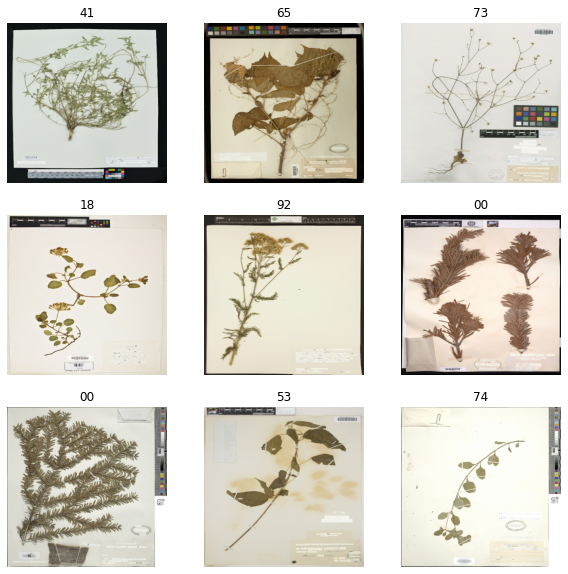

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 500, 500, 3)
(32,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.023529414 0.9808786


In [12]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 500, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 250, 250, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      1

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
146/146 [==============================] - 314s 2s/step - loss: 4.5480 - accuracy: 0.0570 - val_loss: 3.8390 - val_accuracy: 0.1304
Epoch 2/10
146/146 [==============================] - 312s 2s/step - loss: 3.1820 - accuracy: 0.2347 - val_loss: 3.0947 - val_accuracy: 0.2410
Epoch 3/10
146/146 [==============================] - 322s 2s/step - loss: 1.5756 - accuracy: 0.5836 - val_loss: 3.3399 - val_accuracy: 0.2496
Epoch 4/10
146/146 [==============================] - 344s 2s/step - loss: 0.4099 - accuracy: 0.8873 - val_loss: 4.7256 - val_accuracy: 0.2333
Epoch 5/10
146/146 [==============================] - 339s 2s/step - loss: 0.0937 - accuracy: 0.9728 - val_loss: 5.3640 - val_accuracy: 0.2539
Epoch 6/10
146/146 [==============================] - 334s 2s/step - loss: 0.0291 - accuracy: 0.9927 - val_loss: 5.5724 - val_accuracy: 0.2213
Epoch 7/10
146/146 [==============================] - 335s 2s/step - loss: 0.0201 - accuracy: 0.9959 - val_loss: 6.2425 - val_accuracy: 0.2564

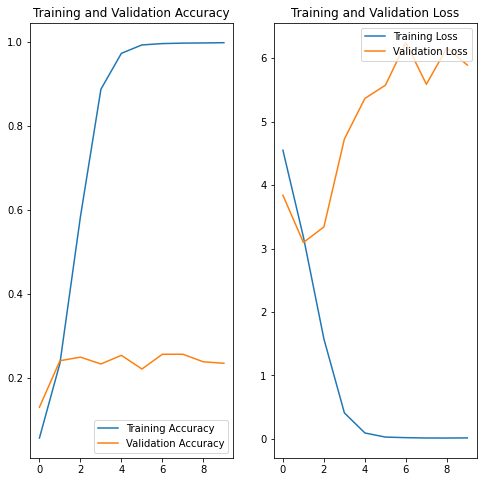

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

y_predict_prob = my_random_forest.predict_proba(X_test)

fpr0, tpr0, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)
AUC0 = metrics.auc(fpr0, tpr0)
print(AUC0)

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()